# Data Pre Processing

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [ ]:
df = pd.read_excel("/content/cust_data.xlsx",index_col = "Cust_ID")
# df

In [ ]:
# Check the Missing Values
df.isnull().sum()

In [ ]:
# Handling missing values with mode imputation in Gender Column
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])


# Encoding the gender column As Male = 1 and Female = 0
enc = OrdinalEncoder()
df['Gender'] = enc.fit_transform(df[['Gender']])


#select column for clustering
columns_for_clustering = list(df.columns)

#scaling to  standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[columns_for_clustering])

In [ ]:
pd.DataFrame(df)

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,1.0,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1.0,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.0,10,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,1.0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,1.0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Finding Optimum No of Cluster (K) value Using Silhouette_score

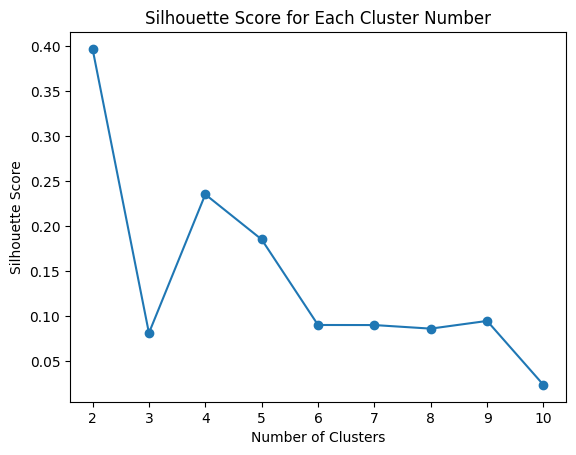

In [ ]:
# Find the optimum no of cluster K using silhouette_score

silhouette_scores = []
cluster_range = range(2, 11)

for i in range(2,11):
    model = KMeans(n_clusters=i, random_state=42)
    cluster_label = model.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_label)
    silhouette_scores.append(silhouette_avg)
plt.plot(cluster_range, silhouette_scores)
plt.scatter(cluster_range, silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Each Cluster Number')
plt.show()

In [ ]:
# The highest point on the silhouette score plot indicates the optimal number of clusters\
# As it corresponds to the highest average silhouette coefficient


max_value = max(silhouette_scores)
silhouette_scores.index(max_value)
optimal_cluster_number = cluster_range[0]
print("Optimal number of clusters should be used : ",optimal_cluster_number)

Optimal number of clusters should be used :  2


# Finding Optimum No of Clusters (K) value using Elbow Method

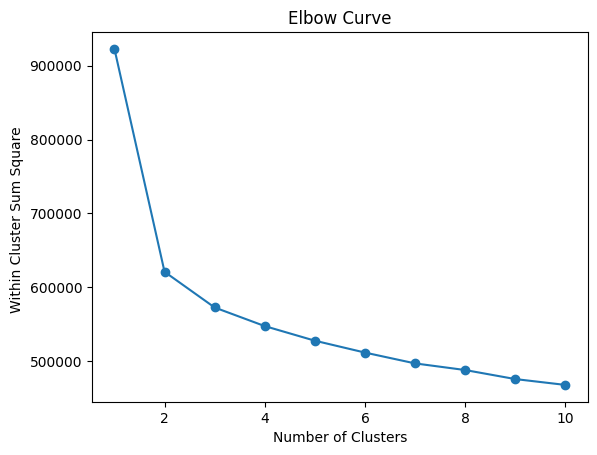

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define a range of cluster numbers to try
cluster_range = range(1, 11)

# Initialize an empty list to store the inertia values (sum of squared distances)
WCSS = []

# Iterate over the cluster range and fit KMeans for each cluster number
for j in cluster_range:
    model = KMeans(n_clusters=j, random_state=42)
    model.fit(df)
    WCSS.append(model.inertia_)

# Plot the elbow curve
plt.plot(cluster_range, WCSS)
plt.scatter(cluster_range, WCSS)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum Square ')
plt.title('Elbow Curve')
plt.show()


#K-Means Clustering Process

In [ ]:
# Apply k-means clustering
Model = KMeans(n_clusters=2, random_state=42)
cluster_labels = Model.fit_predict(df)

# Retrieve the cluster labels(targets)
cluster_labels = Model.labels_


# Add the cluster labels to the original dataset df
df['Cluster'] = cluster_labels

# Print the clusters
print(df['Cluster'].value_counts())


0    16823
1    13177
Name: Cluster, dtype: int64


In [ ]:
df

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Cluster
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,1.0,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,1
2,0.0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.0,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.0,10,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,1.0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,1.0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# PCA Dimensionality Reduction And Visualization Process

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# # Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Apply PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)


# Fit the K-means model on transformed data
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_pca)

# Get the cluster labels
labels = kmeans.labels_

# Get the centroid coordinates in PCA space
centroids_pca = kmeans.cluster_centers_



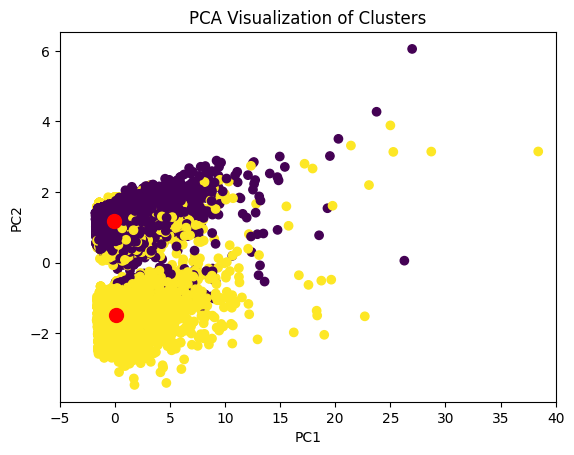

In [ ]:
# Create scatter plot
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels)

# Plot the centroids in PCA space
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='o', color='red', s=100)
plt.xlabel('PC1')
plt.xlim(-5,40)
# plt.ylim(y_min, y_max)
plt.ylabel('PC2')
plt.title('PCA Visualization of Clusters')
plt.show()

# t-Distributed Stochastic Neighbor Embedding (t-SNE) Dimensionality Reduction

In [ ]:
from sklearn.manifold import TSNE


# Apply t-SNE to reduce the dimensionality to 2
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(df)


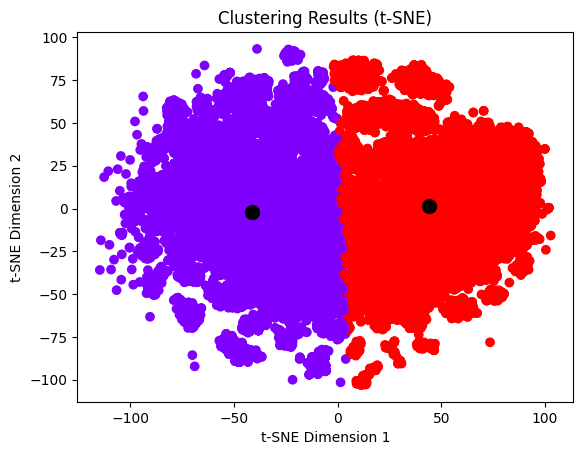

In [ ]:

# # Fit the K-means algorithm with n_clusters=2
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(tsne_data)

# Get the cluster labels
labels = kmeans.labels_

# Get the centroid coordinates in t-SNE
centroids_tsne = kmeans.cluster_centers_


# Plot the clusters using a scatter plot
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c= labels,cmap = 'rainbow')
plt.scatter(centroids_tsne[:, 0], centroids_tsne[:,1], marker='o', color='black', s=100)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Clustering Results (t-SNE)')
plt.show()